In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('coovid19.csv')

In [4]:
df.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


In [5]:
df.dtypes

Date                    object
Country                 object
Population               int64
Total Tests            float64
Total Cases            float64
Total Deaths           float64
Total Recovered        float64
Serious or Critical    float64
Active Cases           float64
dtype: object

In [6]:
for i in df:
      print("column_name = ",i)
      print(df[i].value_counts())
      print("\n")

column_name =  Date
2020-04-30    213
2020-04-19    213
2020-04-21    213
2020-05-06    213
2020-05-04    213
2020-04-28    213
2020-05-09    213
2020-05-03    213
2020-04-18    213
2020-05-13    213
2020-04-29    213
2020-05-17    213
2020-04-23    213
2020-05-18    213
2020-04-20    213
2020-05-08    213
2020-04-22    213
2020-05-01    213
2020-04-27    213
2020-05-12    213
2020-04-24    213
2020-05-02    213
2020-05-07    213
2020-05-14    213
2020-05-15    213
2020-05-16    213
2020-05-11    213
2020-04-26    213
2020-05-05    213
2020-04-25    213
2020-05-10    213
Name: Date, dtype: int64


column_name =  Country
S. Korea                  31
St. Vincent Grenadines    31
Djibouti                  31
Vatican City              31
Mayotte                   31
                          ..
Saint Martin              31
Serbia                    31
Liberia                   31
Bulgaria                  31
Venezuela                 31
Name: Country, Length: 213, dtype: int64


column_nam

In [7]:
df=df.drop(['Date'],axis=1)

In [8]:
df.head()

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [10]:
df['Country']=le.fit_transform(df['Country'])

In [11]:
df.dtypes

Country                  int32
Population               int64
Total Tests            float64
Total Cases            float64
Total Deaths           float64
Total Recovered        float64
Serious or Critical    float64
Active Cases           float64
dtype: object

In [12]:
df.describe()

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
count,6603.000000,6.603000e+03,5.505000e+03,6.554000e+03,5367.000000,6318.000000,4117.000000,6.544000e+03
mean,106.000000,3.637913e+07,2.167252e+05,1.692968e+04,1416.252096,5855.424185,386.748360,9.964142e+03
std,61.491783,1.411537e+08,7.595143e+05,8.861467e+04,6645.247810,23467.641235,1658.428324,6.541025e+04
min,0.000000,8.010000e+02,1.000000e+01,1.000000e+00,0.000000,1.000000,1.000000,0.000000e+00
25%,53.000000,8.672680e+05,2.690000e+03,7.900000e+01,6.000000,26.000000,3.000000,2.600000e+01
50%,106.000000,6.859926e+06,2.547800e+04,6.135000e+02,24.000000,219.000000,13.000000,2.720000e+02
75%,159.000000,2.546422e+07,1.437810e+05,4.877500e+03,199.000000,1394.750000,89.000000,2.041000e+03
max,212.000000,1.439324e+09,1.230074e+07,1.550294e+06,91981.000000,356383.000000,18671.000000,1.101930e+06


In [13]:
df.isnull().sum()

Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64

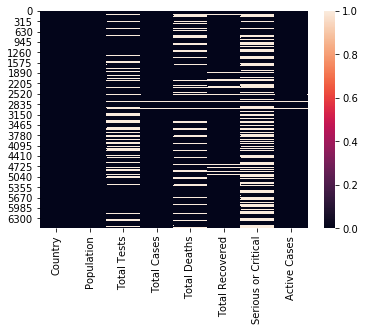

In [14]:
sns.heatmap(df.isnull())

In [15]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='mean')

In [18]:
df['Total Tests']=imp.fit_transform(df['Total Tests'].values.reshape(-1,1))
df['Total Cases']=imp.fit_transform(df['Total Cases'].values.reshape(-1,1))
df['Total Deaths']=imp.fit_transform(df['Total Deaths'].values.reshape(-1,1))
df['Total Recovered']=imp.fit_transform(df['Total Recovered'].values.reshape(-1,1))
df['Serious or Critical']=imp.fit_transform(df['Serious or Critical'].values.reshape(-1,1))
df['Active Cases']=imp.fit_transform(df['Active Cases'].values.reshape(-1,1))

In [19]:
df.isnull().sum()

Country                0
Population             0
Total Tests            0
Total Cases            0
Total Deaths           0
Total Recovered        0
Serious or Critical    0
Active Cases           0
dtype: int64

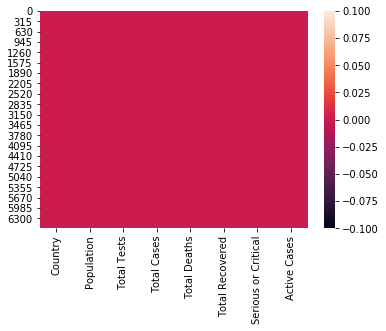

In [20]:
sns.heatmap(df.isnull())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029129748CC8>,
      dtype=object)

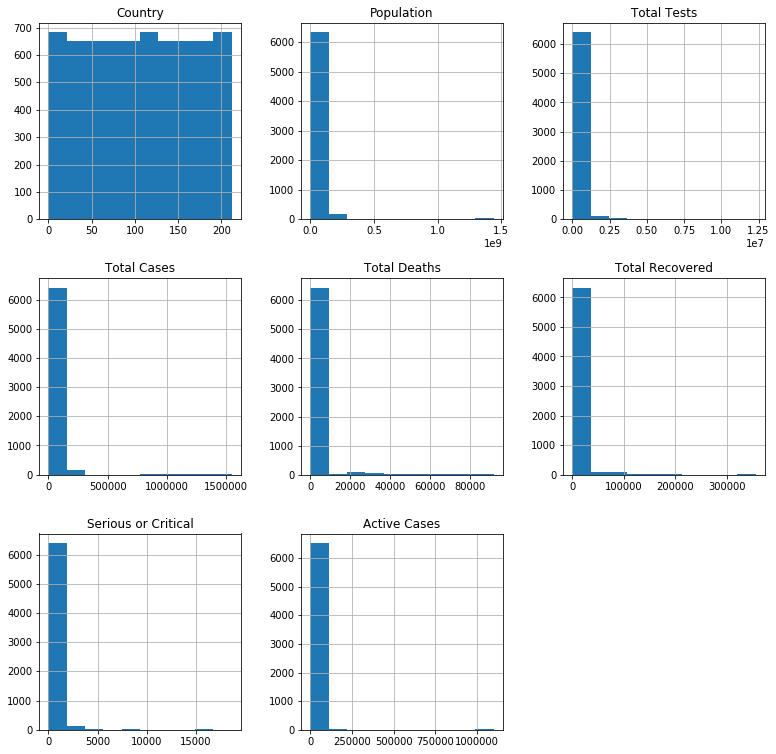

In [21]:
df.hist(figsize=(13,13))

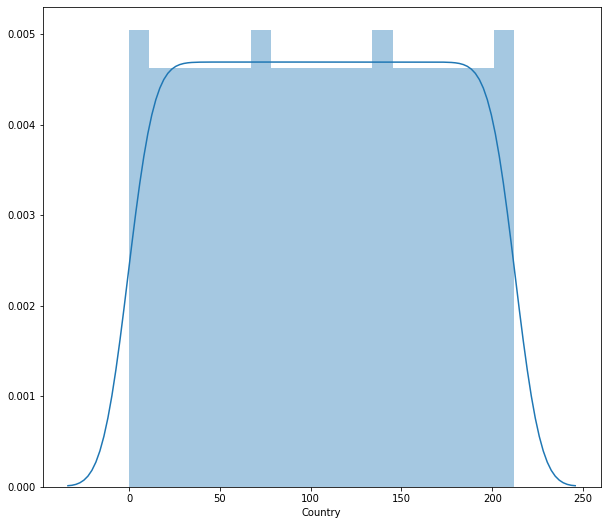

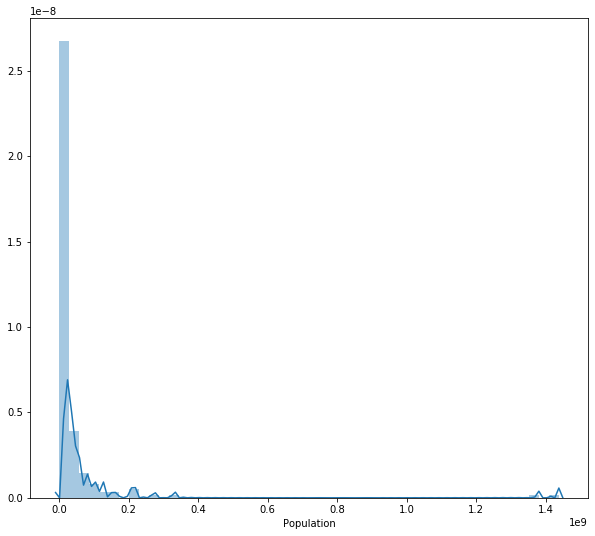

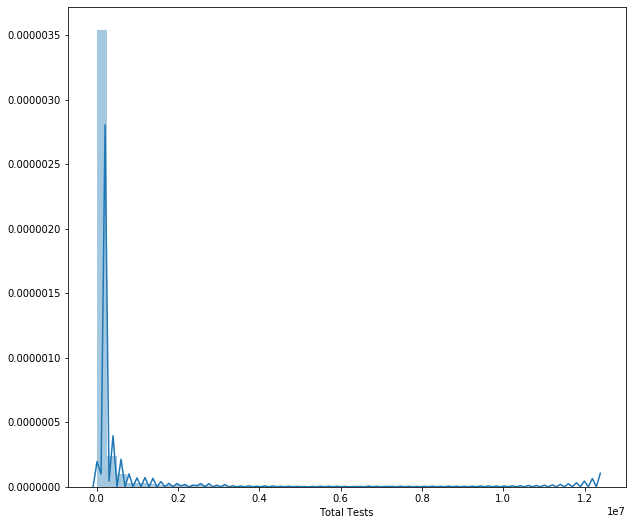

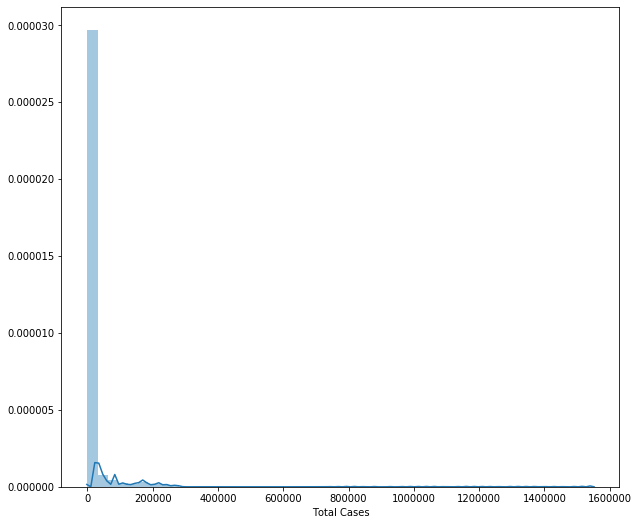

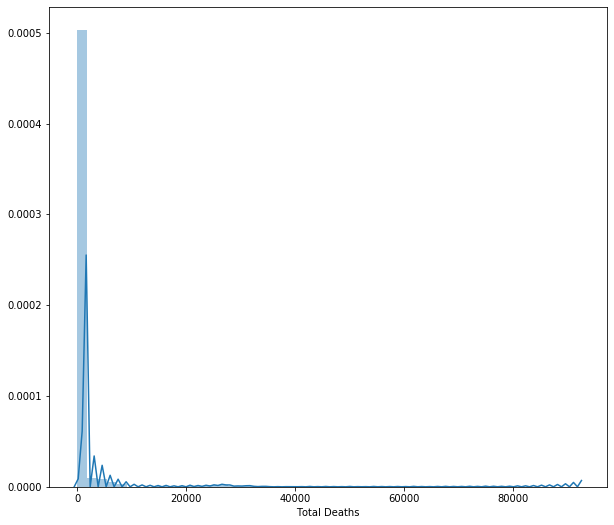

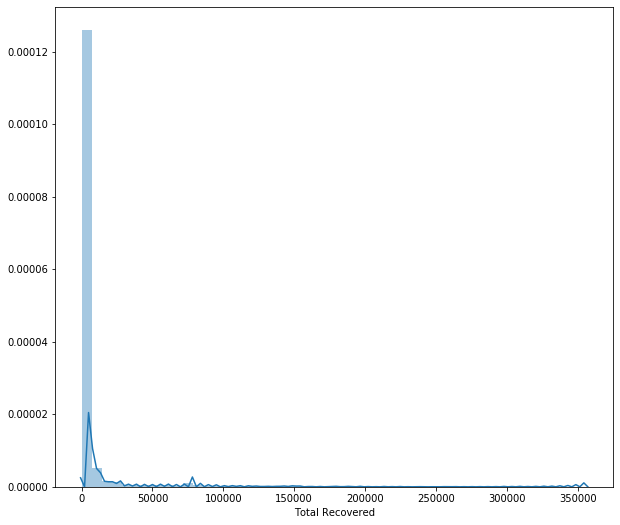

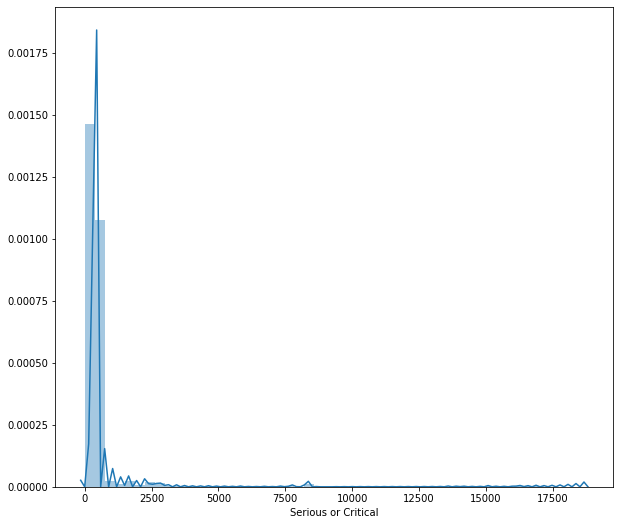

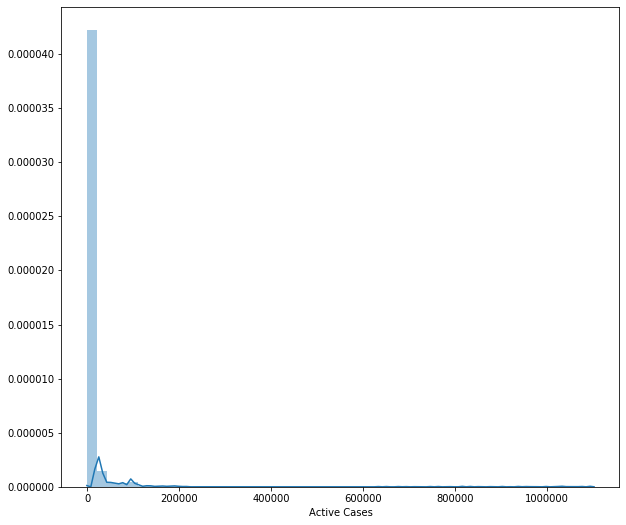

In [22]:
for i in df:
    plt.figure(figsize=(10,30))
    plt.subplot(311)
    sns.distplot(df[i])

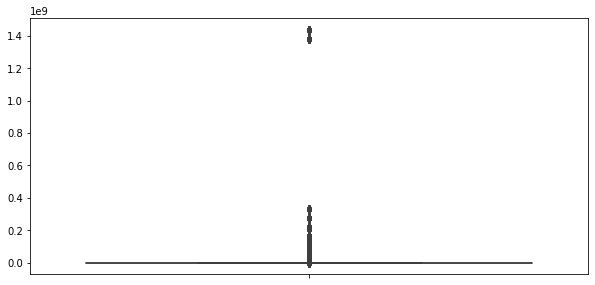

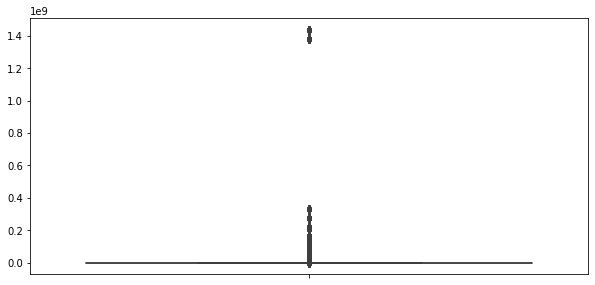

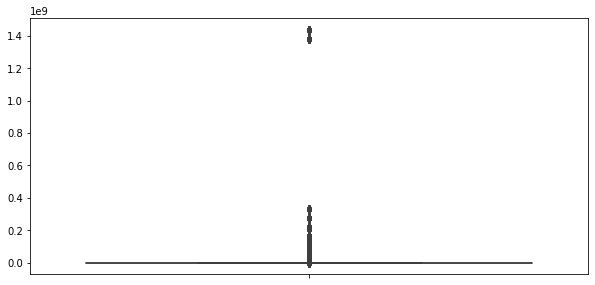

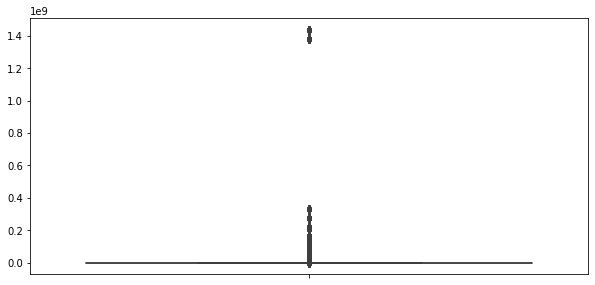

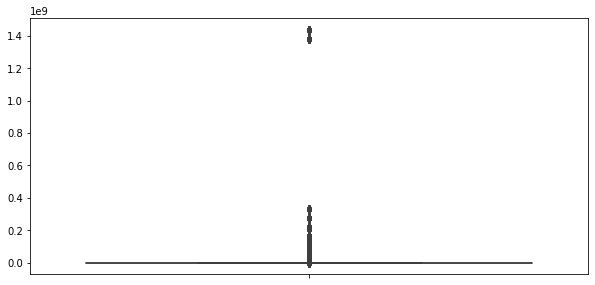

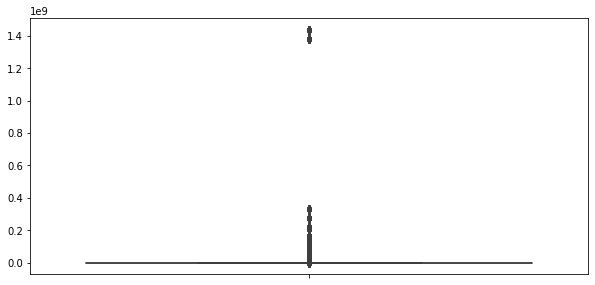

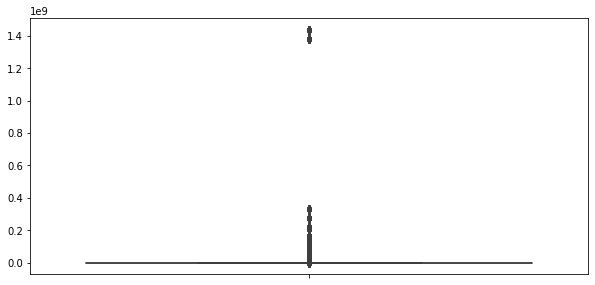

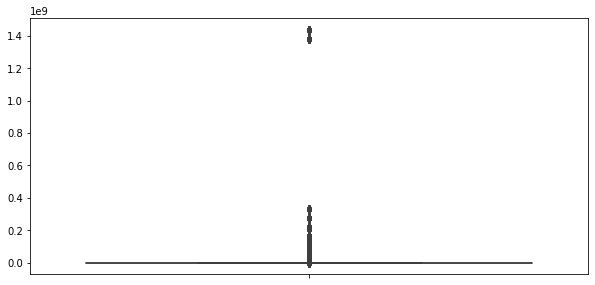

In [23]:
for i in df:
    plt.figure(figsize=(10,50))
    plt.subplot(911)
    sns.boxplot(df,orient='v')

In [24]:
df.columns

Index(['Country', 'Population', 'Total Tests', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Serious or Critical', 'Active Cases'],
      dtype='object')

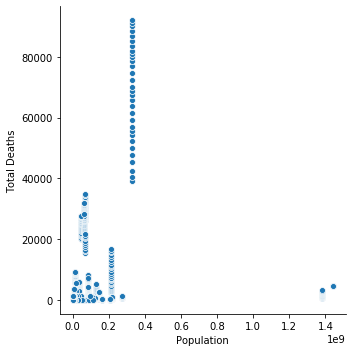

In [25]:
sns.relplot(x='Population',y='Total Deaths',data=df)

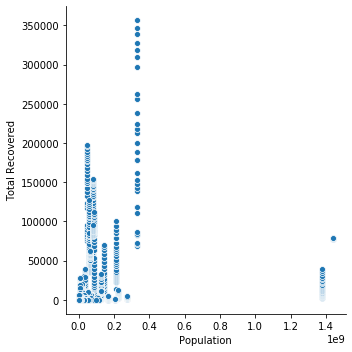

In [26]:
sns.relplot(x='Population',y='Total Recovered',data=df)

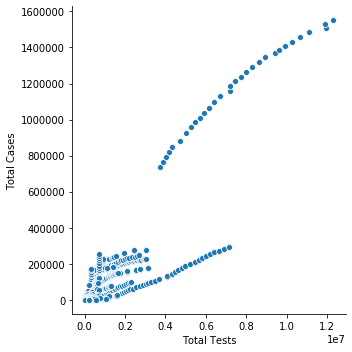

In [27]:
sns.relplot(x='Total Tests',y='Total Cases',data=df)

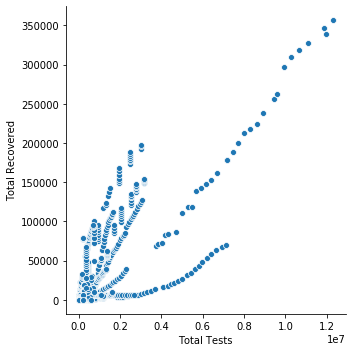

In [28]:
sns.relplot(x='Total Tests',y='Total Recovered',data=df)

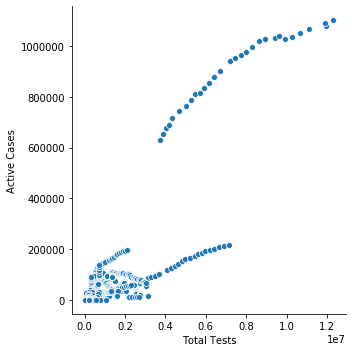

In [29]:
sns.relplot(x='Total Tests',y='Active Cases',data=df)

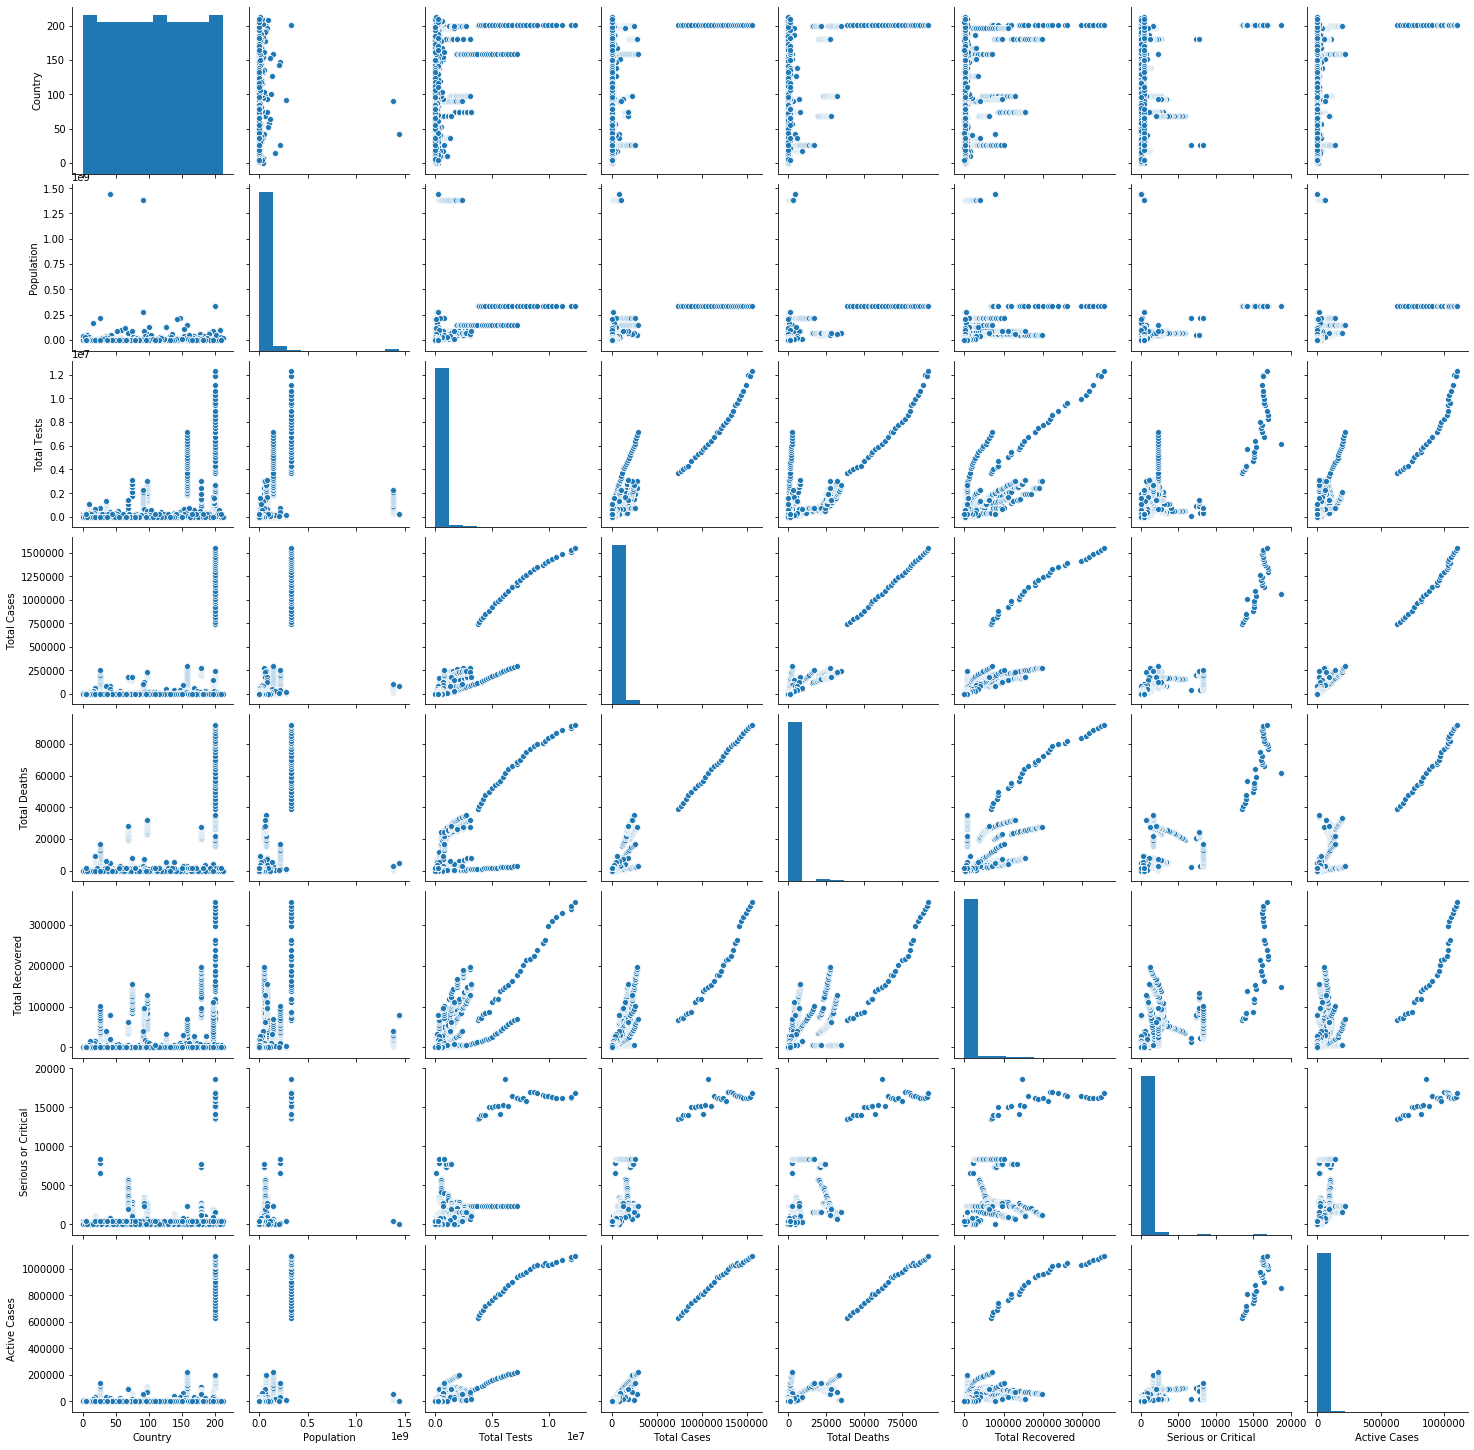

In [30]:
sns.pairplot(df)

In [31]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(6603, 8)
(6272, 8)


In [32]:
df=df_final

In [33]:
df.shape

(6272, 8)

In [34]:
x=df.drop(columns=["Total Deaths"])
y=df[["Total Deaths"]]

In [35]:
x.head()

,Country,Population,Total Tests,Total Cases,Total Recovered,Serious or Critical,Active Cases
1,158,145927292,1831892.0,36793.0,3057.000000,8.0,33423.0
4,200,67844241,460437.0,114217.0,5855.424185,1559.0,98409.0
8,197,84230075,598933.0,82329.0,10453.000000,1894.0,69986.0
9,93,83862642,330137.0,80868.0,55987.000000,3513.0,19850.0
11,152,32915899,135895.0,14420.0,6684.000000,117.0,7388.0


In [36]:
y.head()

,Total Deaths
1,313.0
4,15464.0
8,1890.0
9,5031.0
11,348.0


In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [38]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [39]:
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
x_pca=pca.fit_transform(x)
print("vraiance :{}".format(np.sum(pca.explained_variance_ratio_)))

vraiance :1.0


In [42]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
dtr=DecisionTreeRegressor()
r_state=maxr2_score(dtr,x_pca,y)

r2 score corresponding to  42  is  0.9406552696758529
r2 score corresponding to  43  is  0.9629676342177902
r2 score corresponding to  44  is  0.9644192600320947
r2 score corresponding to  45  is  0.9599008198404742
r2 score corresponding to  46  is  0.9394795128218137
r2 score corresponding to  47  is  0.9613368061282733
r2 score corresponding to  48  is  0.9811811568329449
r2 score corresponding to  49  is  0.9748225011841706
r2 score corresponding to  50  is  0.9740356089271174
r2 score corresponding to  51  is  0.9568220185465294
r2 score corresponding to  52  is  0.975881123214695
r2 score corresponding to  53  is  0.9299553410307922
r2 score corresponding to  54  is  0.8193061540544561
r2 score corresponding to  55  is  0.9790748440995196
r2 score corresponding to  56  is  0.9655708069745846
r2 score corresponding to  57  is  0.9696912755256467
r2 score corresponding to  58  is  0.9490095495619068
r2 score corresponding to  59  is  0.9475620788651105
r2 score corresponding to  60

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,100,500]}
clf = GridSearchCV(rfr, parameters, cv=5,scoring="r2")
clf.fit(x_pca,y)
clf.best_params_

{'n_estimators': 500}

In [44]:
rfr=RandomForestRegressor(n_estimators=500)
r_state=maxr2_score(rfr,x_pca,y)

r2 score corresponding to  42  is  0.9654372399670318
r2 score corresponding to  43  is  0.9798200036603981
r2 score corresponding to  44  is  0.9750878941004696
r2 score corresponding to  45  is  0.9741163537444905
r2 score corresponding to  46  is  0.9608237992463792
r2 score corresponding to  47  is  0.9752224502443148
r2 score corresponding to  48  is  0.9834800856692593
r2 score corresponding to  49  is  0.9765024520341387
r2 score corresponding to  50  is  0.9813175869834007
r2 score corresponding to  51  is  0.9734375852999076
r2 score corresponding to  52  is  0.976118979399617
r2 score corresponding to  53  is  0.963297395147538
r2 score corresponding to  54  is  0.9077298452143316
r2 score corresponding to  55  is  0.9818125095612494
r2 score corresponding to  56  is  0.973887203953509
r2 score corresponding to  57  is  0.9767693363671834
r2 score corresponding to  58  is  0.9586779849816474
r2 score corresponding to  59  is  0.9698413711508128
r2 score corresponding to  60  

In [45]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
parameters = {"n_neighbors":range(2,30)}
clf = GridSearchCV(knr, parameters, cv=5,scoring="r2")
clf.fit(x_pca, y)
clf.best_params_

{'n_neighbors': 3}

In [46]:
knr=KNeighborsRegressor(n_neighbors=3)
r_state=maxr2_score(knr,x_pca,y)

r2 score corresponding to  42  is  0.9719217966526036
r2 score corresponding to  43  is  0.9770972994463626
r2 score corresponding to  44  is  0.9725788105080463
r2 score corresponding to  45  is  0.9743067178307475
r2 score corresponding to  46  is  0.9628171991350711
r2 score corresponding to  47  is  0.973020788869393
r2 score corresponding to  48  is  0.9801448039461405
r2 score corresponding to  49  is  0.9717892970016124
r2 score corresponding to  50  is  0.9779060639093574
r2 score corresponding to  51  is  0.9753235351096197
r2 score corresponding to  52  is  0.9750036186385366
r2 score corresponding to  53  is  0.9661387320838453
r2 score corresponding to  54  is  0.9705012102243062
r2 score corresponding to  55  is  0.9815111341940861
r2 score corresponding to  56  is  0.9759497488000948
r2 score corresponding to  57  is  0.9804765025208387
r2 score corresponding to  58  is  0.956773621836173
r2 score corresponding to  59  is  0.9745530235180551
r2 score corresponding to  60 

In [47]:
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")
svr=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svr, parameters, cv=5,scoring="r2")
clf.fit(x_pca,y)
clf.best_params_

{'C': 10, 'kernel': 'linear'}

In [48]:
svr=SVR(kernel="linear",C=10)
r_state=maxr2_score(svr,x_pca,y)

r2 score corresponding to  42  is  0.24679118521865684
r2 score corresponding to  43  is  0.29761323985625554
r2 score corresponding to  44  is  0.2621670714310991
r2 score corresponding to  45  is  0.2567086206428576
r2 score corresponding to  46  is  0.2168075226396592
r2 score corresponding to  47  is  0.31399588097871967
r2 score corresponding to  48  is  0.3213560997302115
r2 score corresponding to  49  is  0.2756215783842809
r2 score corresponding to  50  is  0.24840502525119024
r2 score corresponding to  51  is  0.28146130975393335
r2 score corresponding to  52  is  0.31497392888092535
r2 score corresponding to  53  is  0.23707145932887497
r2 score corresponding to  54  is  0.27168687650098966
r2 score corresponding to  55  is  0.2969844580754657
r2 score corresponding to  56  is  0.26434343642861424
r2 score corresponding to  57  is  0.1881284220705508
r2 score corresponding to  58  is  0.21552472970817105
r2 score corresponding to  59  is  0.28027034896759373
r2 score correspo

In [49]:
print("DECISION TREE REGRESSOR\n\n")
model_evaluation(dtr,x_pca,y)

DECISION TREE REGRESSOR


Mean r2 score for regressor:  0.8238358197194243
standard deviation in r2 score for regressor:  0.13858181653069832
[0.57209592 0.94822559 0.82832982 0.95458847 0.8159393 ]


In [50]:
print("RANDOM FOREST REGRESSOR\n\n")
model_evaluation(rfr,x_pca,y)

RANDOM FOREST REGRESSOR


Mean r2 score for regressor:  0.8749393360155524
standard deviation in r2 score for regressor:  0.10555735624286633
[0.68439704 0.96982201 0.8601339  0.97535053 0.8849932 ]


In [51]:
print("KNN REGRESSOR\n\n")
model_evaluation(knr,x_pca,y)

KNN REGRESSOR


Mean r2 score for regressor:  0.8188439136184966
standard deviation in r2 score for regressor:  0.18025720463202388
[0.48820742 0.95757716 0.88601161 0.98514656 0.77727681]


In [52]:
print("SVM REGRESSOR\n\n")
model_evaluation(svr,x_pca,y)

SVM REGRESSOR


Mean r2 score for regressor:  0.24901169446546678
standard deviation in r2 score for regressor:  0.01452296065941503
[0.26372348 0.26219109 0.25609788 0.23039902 0.232647  ]


In [54]:
#randomforest is performing better
x_train, x_test, y_train, y_test = train_test_split(x_pca, y,random_state = 76,test_size=0.20)
rfr.fit(x_train,y_train)
y_pred =rfr.predict(x_test)

In [55]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  150.42991675191055
r2_score is:  0.9778218674008984


In [56]:
from sklearn import externals
import joblib
joblib.dump(rfr,'Covid19.pkl')

['Covid19.pkl']